In [107]:
import config
import requests
from time import sleep
import config
import operator
import json
from pprint import pprint


group_ids=[]
with open('top100.json', 'r') as read_file:
    json_data=json.load(read_file)
    for _ in range(5):
        group_ids.append(str(json_data[_]['group_id']))
    print(group_ids)

group_ids=['80006177', '45842880', '38079632','32376169','2992']

group_ids_str=','.join(group_ids)
print(group_ids_str)

['24098496', '37119411', '29302425', '15548215', '45842880']
80006177,45842880,38079632,32376169,2992


<h1>Специально перезаписал группы, чтобы не слишком долго загружалос</h1>

In [108]:
url_member_count = 'https://api.vk.com/method/groups.getById'
print(str(group_ids).replace(' ',''))
params=dict(token=config.access_token, group_ids=group_ids_str, fields='members_count')
# sss='https://api.vk.com/method/groups.getById?token=1075618e48bdf091efd04ef3933cacd100ebd99744da84b15e944a26acdd5f76af853a75bacbd50111120&group_ids=24098496,37119411,29302425,15548215,45842880&fields=members_count'
response_member_count = requests.get(url_member_count, params)
print(response_member_count.url)

pprint((response_member_count.json()['response']))

['80006177','45842880','38079632','32376169','2992']
https://api.vk.com/method/groups.getById?token=5c6fd7621412f67a2a568bb487aa461a843a358b860d4ba7e90304e4c7249fc773d4a8a04ccf096bad5c4&group_ids=80006177%2C45842880%2C38079632%2C32376169%2C2992&fields=members_count
[{'gid': 80006177,
  'is_closed': 0,
  'members_count': 36810,
  'name': 'Познер Online',
  'photo': 'https://pp.userapi.com/c837327/v837327576/17299/lrhvkok_CTk.jpg',
  'photo_big': 'https://pp.userapi.com/c837327/v837327576/17296/fryk8EgIHww.jpg',
  'photo_medium': 'https://pp.userapi.com/c837327/v837327576/17298/h-Mx-bZWz-g.jpg',
  'screen_name': 'pozneronline_ru',
  'type': 'page'},
 {'gid': 45842880,
  'is_closed': 0,
  'members_count': 18259,
  'name': 'The Foundation',
  'photo': 'https://pp.userapi.com/c628728/v628728207/5a7a/mVqIFg_gaV4.jpg',
  'photo_big': 'https://pp.userapi.com/c628728/v628728207/5a78/HaetKx3b7f0.jpg',
  'photo_medium': 'https://pp.userapi.com/c628728/v628728207/5a79/I4o6EMQ2B24.jpg',
  'screen_n

In [111]:
datas=[]
da1=response_member_count.json()['response'][0]
da2=response_member_count.json()['response'][1]
da3=response_member_count.json()['response'][2]
da4=response_member_count.json()['response'][3]
da5=response_member_count.json()['response'][4]
datas=[da1,da2,da3,da4,da5]
    
# datas=[da1,da2,da3, da]

pprint(datas)

[{'gid': 80006177,
  'is_closed': 0,
  'members_count': 36810,
  'name': 'Познер Online',
  'photo': 'https://pp.userapi.com/c837327/v837327576/17299/lrhvkok_CTk.jpg',
  'photo_big': 'https://pp.userapi.com/c837327/v837327576/17296/fryk8EgIHww.jpg',
  'photo_medium': 'https://pp.userapi.com/c837327/v837327576/17298/h-Mx-bZWz-g.jpg',
  'screen_name': 'pozneronline_ru',
  'type': 'page'},
 {'gid': 45842880,
  'is_closed': 0,
  'members_count': 18259,
  'name': 'The Foundation',
  'photo': 'https://pp.userapi.com/c628728/v628728207/5a7a/mVqIFg_gaV4.jpg',
  'photo_big': 'https://pp.userapi.com/c628728/v628728207/5a78/HaetKx3b7f0.jpg',
  'photo_medium': 'https://pp.userapi.com/c628728/v628728207/5a79/I4o6EMQ2B24.jpg',
  'screen_name': 'laythefoundation',
  'type': 'page'},
 {'gid': 38079632,
  'is_closed': 0,
  'members_count': 22373,
  'name': 'Party Quant',
  'photo': 'https://pp.userapi.com/c312820/v312820245/654f/DblmvgegP4o.jpg',
  'photo_big': 'https://pp.userapi.com/c312820/v31282024

In [112]:
import time
from datetime import date
from datetime import datetime 


for each in datas:
    member_left = each['members_count']
    member_left_show=member_left
    offset=0
    users_raw_data=[]
    each['ages']=[]
    each['sex']=[]
    users_age=[]
    users_sex=[]
    print(each['gid'])
    while member_left>0:
        data = dict(group_id=each['gid'], access_token=config.access_token, v='5.63', offset=offset)
        r = requests.get('https://api.vk.com/method/execute.getpeople', params=data)
        sleep(0.34)
        users_raw_data.extend(r.json()['response'][0])
        offset+=20000
        member_left-=20000
        print('Обрабатывается {0} из {1}'.format(offset,member_left_show))

    for every in users_raw_data:
        try:
            if len(every['bdate'])>6:
                bdate_date = datetime.strptime(every['bdate'], '%d.%m.%Y')
                today = date.today()
                age=today.year - bdate_date.year - ((today.month, today.day) < (bdate_date.month, bdate_date.day))
                users_age.append(age)
        except:
            pass
        users_sex.append(every['sex'])
        
    each['ages'].extend(users_age)
    each['sex'].extend(users_sex)

# pprint(datas)
        
    
    

80006177
Обрабатывается 20000 из 36810
Обрабатывается 40000 из 36810
45842880
Обрабатывается 20000 из 18259
38079632
Обрабатывается 20000 из 22373
Обрабатывается 40000 из 22373
32376169
Обрабатывается 20000 из 116498
Обрабатывается 40000 из 116498
Обрабатывается 60000 из 116498
Обрабатывается 80000 из 116498
Обрабатывается 100000 из 116498
Обрабатывается 120000 из 116498
2992
Обрабатывается 20000 из 312041
Обрабатывается 40000 из 312041
Обрабатывается 60000 из 312041
Обрабатывается 80000 из 312041
Обрабатывается 100000 из 312041
Обрабатывается 120000 из 312041
Обрабатывается 140000 из 312041
Обрабатывается 160000 из 312041
Обрабатывается 180000 из 312041
Обрабатывается 200000 из 312041
Обрабатывается 220000 из 312041
Обрабатывается 240000 из 312041
Обрабатывается 260000 из 312041
Обрабатывается 280000 из 312041
Обрабатывается 300000 из 312041
Обрабатывается 320000 из 312041
[{'ages': [31,
           30,
           31,
           29,
           31,
           28,
           29,
        

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [120]:
ds1=pd.Series(datas[3]['sex'])
ds2=pd.Series(datas[3]['ages'])

In [121]:
print(ds1.shape)
print(ds2.shape)

(1000,)
(341,)


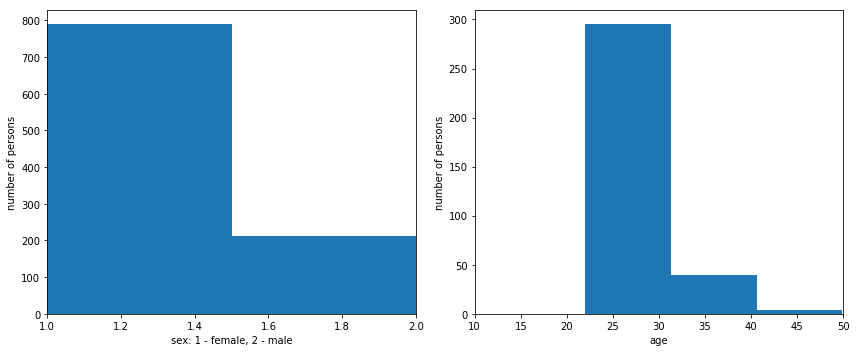

In [122]:

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)

plt.hist(ds1, bins=2);
plt.xlabel('sex: 1 - female, 2 - male')
plt.ylabel('number of persons')

plt.xlim([1,2])

plt.subplot(1,2,2)
plt.hist(ds2, bins=10);
plt.xlim([10, 50])
plt.xlabel('age')
plt.ylabel('number of persons')
plt.tight_layout()